/tmp/ipython-input-2561992474.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, period="2y", interval="1d").dropna()
[*********************100%***********************]  1 of 1 completed


LinearRegression MAE: 3.479 RMSE: 29.587
RandomForest MAE: 5.481 RMSE: 53.406


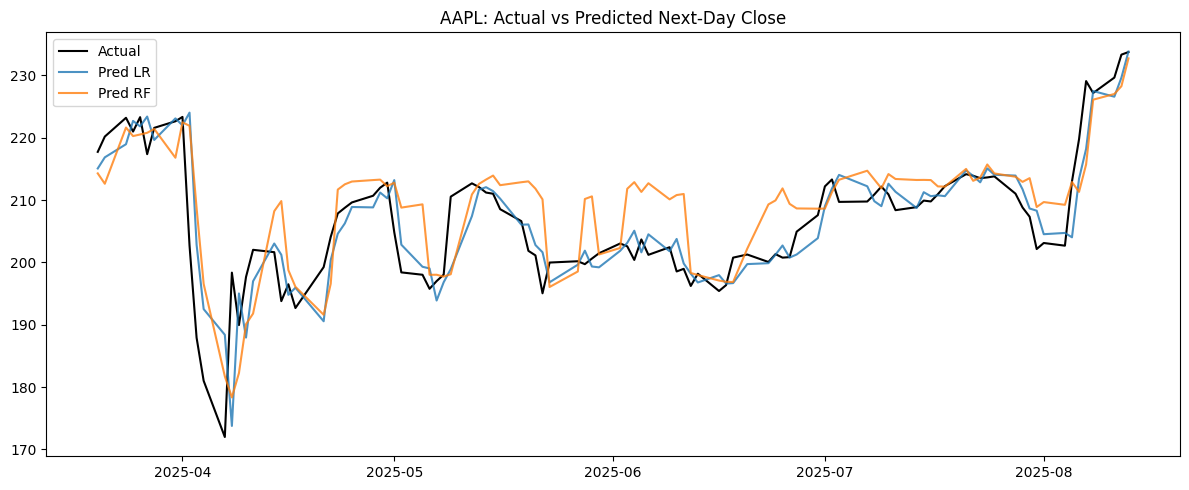

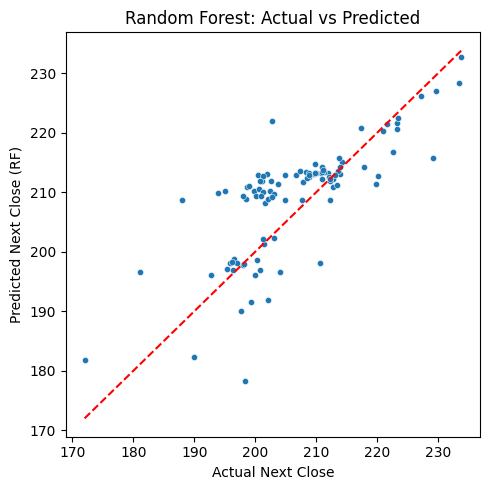

In [5]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

symbol = "AAPL" # change to TSLA/MSFT if you like
df = yf.download(symbol, period="2y", interval="1d").dropna()
df = df[["Open","High","Low","Close","Volume"]].copy()

df["NextClose"] = df["Close"].shift(-1)
df = df.dropna()

X = df[["Open","High","Low","Volume"]].values
y = df["NextClose"].values

split = int(len(df)*0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_s, y_train)
pred_lr = lr.predict(X_test_s)

rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(X_train, y_train) # trees handle raw scales fine
pred_rf = rf.predict(X_test)

def eval_print(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred) # Removed squared=False
    print(f"{name} MAE: {mae:.3f} RMSE: {rmse:.3f}")

eval_print("LinearRegression", y_test, pred_lr)
eval_print("RandomForest", y_test, pred_rf)

plt.figure(figsize=(12,5))
plt.plot(df.index[split:], y_test, label="Actual", color="black")
plt.plot(df.index[split:], pred_lr, label="Pred LR", alpha=0.8)
plt.plot(df.index[split:], pred_rf, label="Pred RF", alpha=0.8)
plt.title(f"{symbol}: Actual vs Predicted Next-Day Close")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(5,5))
sns.scatterplot(x=y_test, y=pred_rf, s=20)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Next Close")
plt.ylabel("Predicted Next Close (RF)")
plt.title("Random Forest: Actual vs Predicted")
plt.tight_layout()
plt.show()